In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import quandl as ql
from scipy import stats
from pathlib import Path

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\abuub\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# NASDAQ CFTC Analysis
#### (i)Clean data; (ii)Calculate 'Net Non-commercial contracts'; (iii)Calculate  z-scores; (iv)Add security data to list; (v)Plot results; (vi) Plot price chart

In [2]:
#Getting CFTC data from Quandl
ql.ApiConfig.api_key = 'tJdgrzhuFvMvkw--DdYw'
nasdaq_data = ql.get('CFTC/209742_FO_L_ALL')
nasdaq_data.head()

,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short
Date,,,,,,,,,,
1999-06-22,537.0,227.0,40.0,0.0,10.0,154.0,237.0,194.0,300.0,343.0
1999-06-29,1299.0,517.0,251.0,0.0,383.0,618.0,900.0,869.0,399.0,430.0
1999-07-06,1525.0,510.0,348.0,5.0,576.0,650.0,1091.0,1003.0,434.0,522.0
1999-07-13,2236.0,1293.0,325.0,5.0,470.0,1399.0,1768.0,1729.0,468.0,507.0
1999-07-20,2653.0,1663.0,450.0,73.0,416.0,1625.0,2152.0,2148.0,501.0,505.0


In [3]:
nas_data_noncommerical = nasdaq_data[['Noncommercial Long','Noncommercial Short']]
nas_data_noncommerical.head()

,Noncommercial Long,Noncommercial Short
Date,,
1999-06-22,227.0,40.0
1999-06-29,517.0,251.0
1999-07-06,510.0,348.0
1999-07-13,1293.0,325.0
1999-07-20,1663.0,450.0


In [4]:
nas_data_noncommerical.to_csv('nasdaq.csv')

In [5]:
nas_data_noncommerical["Net Noncommercial Futures/Options"] = nas_data_noncommerical.loc[:,"Noncommercial Long"] - nas_data_noncommerical.loc[:,"Noncommercial Short"]

C:\Users\abuub\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
nas_data_noncommerical.head()

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options
Date,,,
1999-06-22,227.0,40.0,187.0
1999-06-29,517.0,251.0,266.0
1999-07-06,510.0,348.0,162.0
1999-07-13,1293.0,325.0,968.0
1999-07-20,1663.0,450.0,1213.0


In [7]:
Average_nasdaq = nas_data_noncommerical["Net Noncommercial Futures/Options"].mean()
x = np.array(nas_data_noncommerical["Net Noncommercial Futures/Options"])
std_nasdaq = x.std()

C:\Users\abuub\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


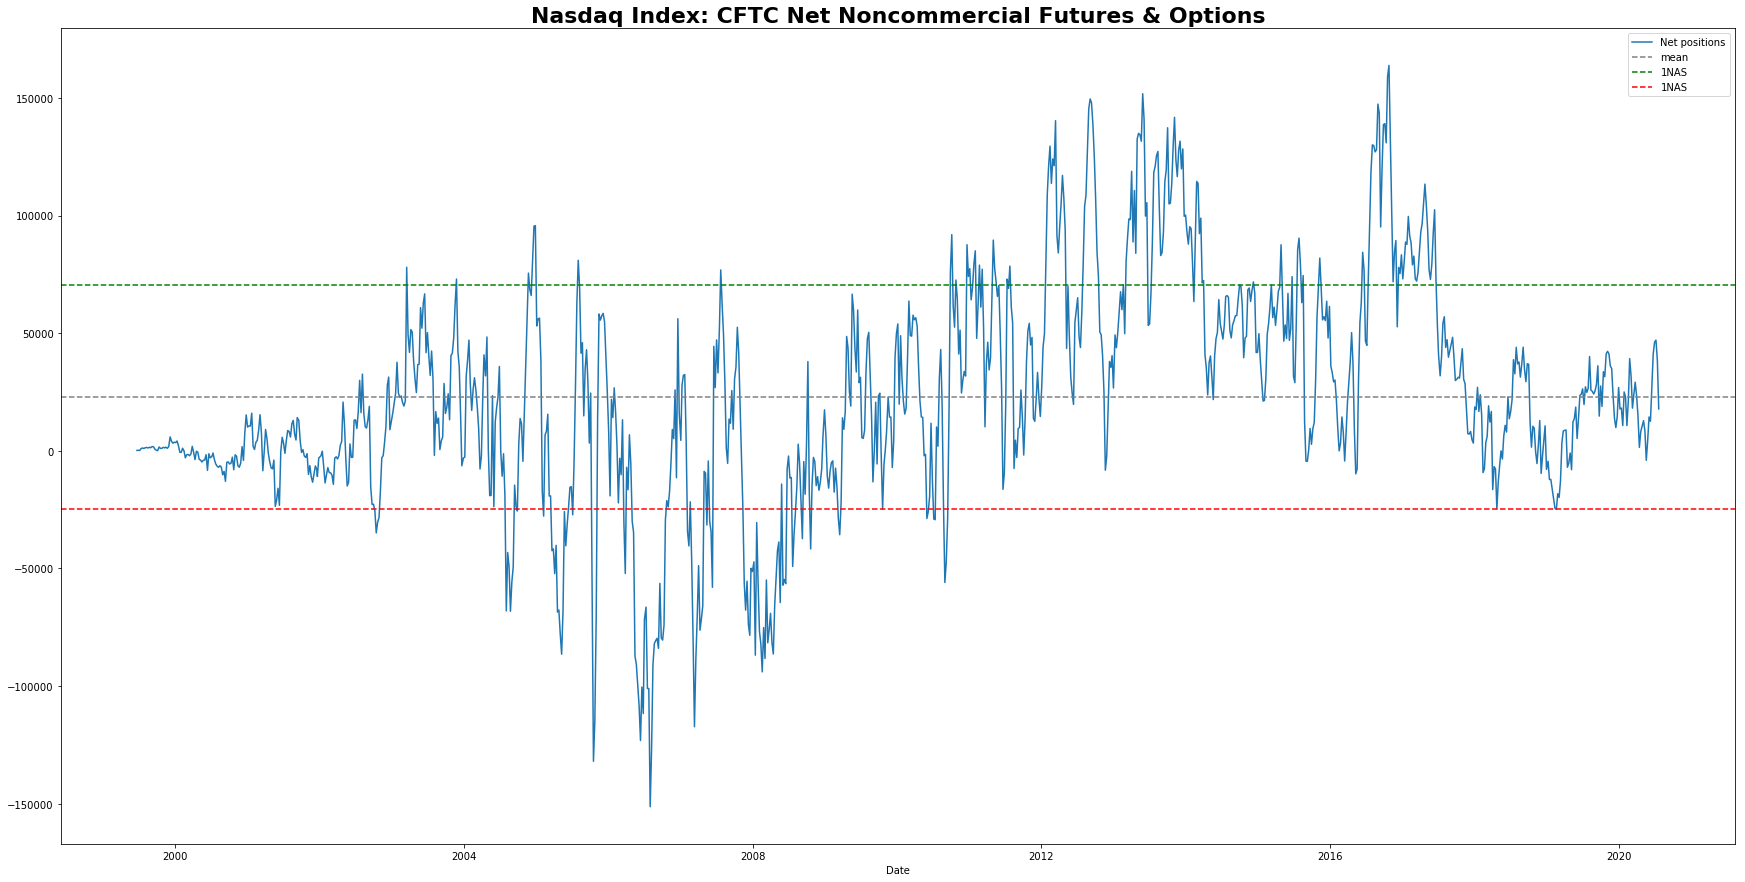

In [8]:
#Plot S&P500 CFTC data
def create_plot(data):
    x = nas_data_noncommerical.index
    y = nas_data_noncommerical.loc[:,"Net Noncommercial Futures/Options"]
    std_positive = (Average_nasdaq + std_nasdaq)
    std_negative = (Average_nasdaq- std_nasdaq)

    plt.subplots(figsize=(30,15))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average_nasdaq,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1NAS")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1NAS")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"Nasdaq Index: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(nas_data_noncommerical["Net Noncommercial Futures/Options"])

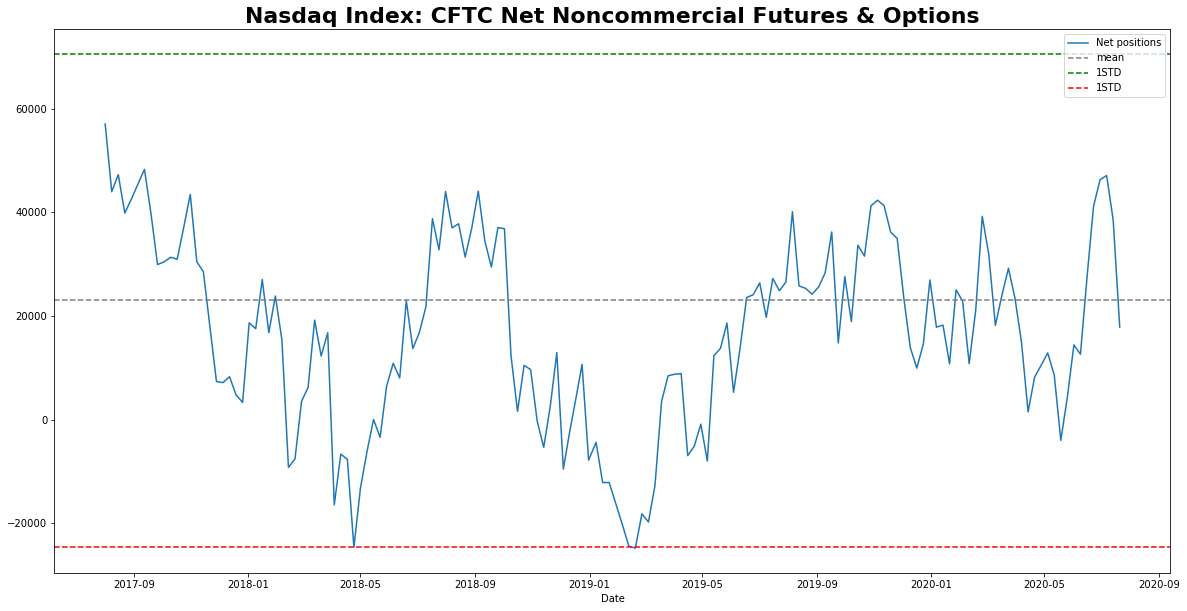

In [9]:
def create_plot(data):
    x = nas_data_noncommerical.index[-156:]
    y = nas_data_noncommerical["Net Noncommercial Futures/Options"][-156:]
    std_positive = (Average_nasdaq + std_nasdaq)
    std_negative = (Average_nasdaq - std_nasdaq)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average_nasdaq,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"Nasdaq Index: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(nas_data_noncommerical["Net Noncommercial Futures/Options"][-156:])

In [10]:
nas_data_noncommerical.head()

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options
Date,,,
1999-06-22,227.0,40.0,187.0
1999-06-29,517.0,251.0,266.0
1999-07-06,510.0,348.0,162.0
1999-07-13,1293.0,325.0,968.0
1999-07-20,1663.0,450.0,1213.0


In [11]:
file_path = Path("Data/nasdaq_rep1.csv")
nasdaq_data = pd.read_csv(file_path)
nasdaq_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2012,2657.389893,2665.899902,2641.979980,2648.719971,2648.719971,1636850000
1,1/4/2012,2639.899902,2653.179932,2627.229980,2648.360107,2648.360107,1670530000
2,1/5/2012,2642.570068,2673.560059,2631.229980,2669.860107,2669.860107,1836410000
3,1/6/2012,2671.169922,2682.120117,2658.830078,2674.219971,2674.219971,1683090000
4,1/9/2012,2682.979980,2683.780029,2662.959961,2676.560059,2676.560059,1768080000


In [12]:
nasdaq_data['Date'] = nasdaq_data['Date'].astype('datetime64[ns]') 

nasdaq_data =nasdaq_data[['Date','Adj Close']]
nasdaq_data.set_index('Date',inplace=True)
nasdaq_data.head()

,Adj Close
Date,
2012-01-03,2648.719971
2012-01-04,2648.360107
2012-01-05,2669.860107
2012-01-06,2674.219971
2012-01-09,2676.560059


In [13]:
nasdaq_data['Returns'] = nasdaq_data.pct_change()
nasdaq_data.fillna(0, inplace=True)
nasdaq_data.head()

,Adj Close,Returns
Date,,
2012-01-03,2648.719971,0.000000
2012-01-04,2648.360107,-0.000136
2012-01-05,2669.860107,0.008118
2012-01-06,2674.219971,0.001633
2012-01-09,2676.560059,0.000875


C:\Users\abuub\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


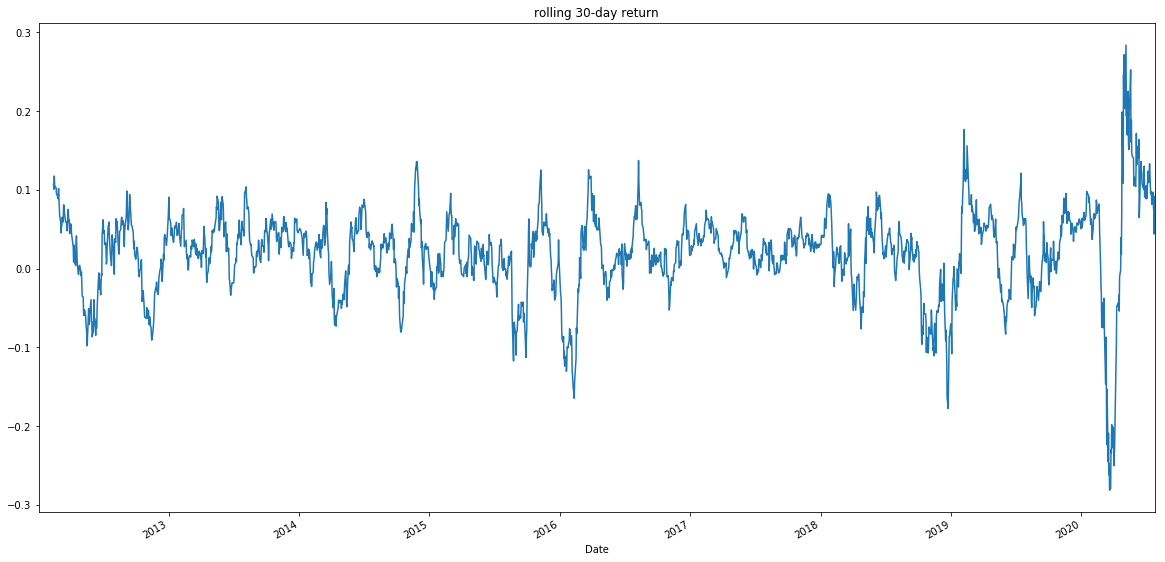

In [14]:
#calculating a rolling 30-day return
cumulative_returns_df = (nasdaq_data.loc[:,'Returns']+1).rolling(30).apply(np.prod)-1

ax = cumulative_returns_df.plot(figsize=(20,10),title = "rolling 30-day return")
#ax.axis(["2015-03-03", "2019-05-01", 0.0, 0.035])

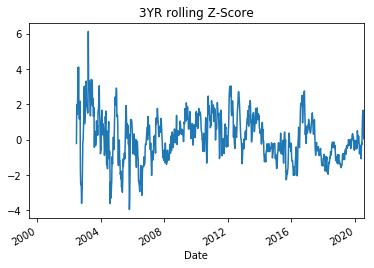

In [15]:
def zscore(x, window):
    r = x.rolling(window=window)
    m = r.mean().shift(1)
    s = r.std(ddof=0).shift(1)
    z = (x-m)/s
    return z
#z_score_historical_cbt = ((CBT_data["Net Noncommercial Futures/Options"][-1]) - Average_cbt)/std_cbt
#z_score_historical_cbt

nas_data_noncommerical['Z_score_3yr'] = zscore(nas_data_noncommerical["Net Noncommercial Futures/Options"] , 52*3)
nas_data_noncommerical['Z_score_3yr'].plot(title="3YR rolling Z-Score")

In [16]:
nas_data_noncommerical[nas_data_noncommerical['Z_score_3yr'] < -2.8]

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options,Z_score_3yr
Date,,,,
2002-10-15,16740.0,51622.0,-34882.0,-3.606114
2002-10-22,22733.0,53031.0,-30298.0,-2.979766
2004-08-03,35965.0,104000.0,-68035.0,-3.622321
2004-08-24,63152.0,131342.0,-68190.0,-3.303604
2005-05-03,66067.0,144023.0,-77956.0,-2.812154
2005-05-10,76972.0,163403.0,-86431.0,-2.979449
2005-10-18,73891.0,205847.0,-131956.0,-3.952317
2005-10-25,70935.0,185360.0,-114425.0,-3.312310
2006-06-13,126740.0,249876.0,-123136.0,-2.946456


In [17]:
# Retrieve index for each date that cross oversold threshold
special_df = cumulative_returns_df.reset_index()

special_df.loc[special_df["Date"] == "2016-07-12"]
special_df.loc[special_df["Date"] == "2016-07-19"]
special_df.loc[special_df["Date"] == "2016-12-20"]
special_df.loc[special_df["Date"] == "2016-12-27"]
special_df.loc[special_df["Date"] == "2017-01-03"]
special_df.loc[special_df["Date"] == "2017-01-10"]
special_df.loc[special_df["Date"] == "2017-01-17"]
special_df.loc[special_df["Date"] == "2017-01-24"]
special_df.loc[special_df["Date"] == "2017-01-31"]
special_df.loc[special_df["Date"] == "2017-02-07"]
special_df.loc[special_df["Date"] == "2017-02-14"]
print(special_df.loc[special_df["Date"] == "2018-02-06"])

# Show returns for 30 days after crossing oversold threshold
special_df.loc[1136+30]
special_df.loc[1141+30]
special_df.loc[1249+30]
special_df.loc[1253+30]
special_df.loc[1257+30]
special_df.loc[1262+30]
special_df.loc[1266+30]
special_df.loc[1271+30]
special_df.loc[1276+30]
special_df.loc[1281+30]
special_df.loc[1286+30]
special_df.loc[1532+30]

           Date  Returns
1533 2018-02-06  0.02161


Date       2018-03-20 00:00:00
Returns              0.0569456
Name: 1562, dtype: object

In [18]:
returns_post_oversold_threshold = special_df[special_df["Date"].isin(["2016-08-23", 
                                         "2016-08-30", 
                                         "2017-02-03",
                                         "2017-02-09", 
                                         "2017-02-15", 
                                         "2017-02-23", 
                                         "2017-03-01", 
                                         "2017-03-08", 
                                         "2017-03-15", 
                                         "2017-03-22", 
                                         "2017-03-29", 
                                         "2018-03-21"])]

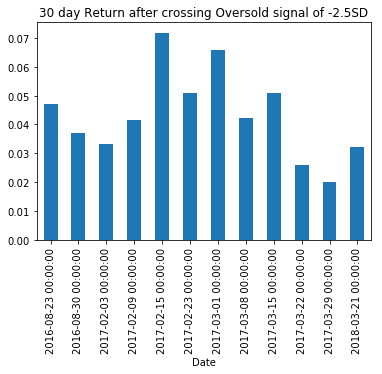

In [19]:
ax = returns_post_oversold_threshold.plot.bar(x='Date', 
                                              y='Returns', 
                                              rot=90, 
                                              title= "30 day Return after crossing Oversold signal of -2.5SD", 
                                              legend = None)